# Bank Marketing Campaign: Get Customers Potential

## Business Problem Understanding

**Context / Domain Knowledge**

Produk keuangan yang digunakan masyarakat sangat beragam. Salah satu produk keuangan yang cukup terkenal adalah deposit jangka waktu tertentu. Mekanisme deposit tersebut adalah nasabah melakukan deposit sejumlah uang ke suatu bank atau institusi keuangan. Uang yang telah di depositkan oleh nasabah tidak bisa diambil sebelum jangka waktu yang telah di sepakati. Sebagai kompensasinya, nasabah akan mendapatkan bunga sesuai dengan sejumlah uang yang telah di depostikan.

Target : Deposit

No : Nasabah tidak tertarik deposit

Yes : Nasabah tertarik deposit

**Business Problem**

Bank berkomitmen untuk terus bersaing agar tidak kehilangan nasabah. Salah satu caranya dengan melakukan Marketing Campaign agar bisa mendapatkan nasabah baru. Namun bank ingin Marketing Campaign ini berjalan efisien agar tidak memerlukan banyak biaya dan waktu.

Berdasarkan data Marketing Campaign sebelumnya, agar Marketing Campaign berjalan efisien, perlu adanya suatu sistem yang dapat membantu bank khususnya Tim Marketing, dalam memprediksi apakah nasabah tertarik deposit atau tidak setelah menerima penawaran melalui Marketing Campaign. Karena jika bank menawarkan produk deposit kepada nasabah yang tidak tertarik tentunya akan ada biaya dan waktu yang terbuang sia-sia dalam melakukan Marketing Campaign.




**Goals**

Berdasarkan permasalahan diatas, bank ingin adanya sistem yang dapat memprediksi nasabah yang tertarik deposit sebanyak mungkin, kemudian sistem tersebut juga bisa melakukan prediksi sebaik mungkin untuk mendapatkan nasabah yang benar tertarik deposit. Sehingga bank bisa lebih efisien dalam melakukan Campaign Marketing dan kemudian memberikan pelayanan terbaik kepada nasabah yang telah deposit.

Selain itu bank ingin mengetahui faktor apa saja yang mempengaruhi seorang nasabah tertarik atau tidak tertarik deposit.



**Analytic Approach**

Saya akan melakukan analisis untuk mengetahui pola dan karakteristik yang membedakan nasabah yang tertarik deposit dan yang tidak tertarik deposit dari fitur-fitur yang ada.

Kemudian membangun sebuah model klasifikasi yang tepat untuk melakukan prediksi peluang nasabah yang tertarik deposit dan tidak tertarik deposit

**Determine Method Evaluation**

TP : Nasabah diprediksi tertarik deposit dan sebenarnya tertarik deposit.

TN : Nasabah diprediksi tidak tertarik deposit dan sebenarnya tidak tertarik deposit.

FP : Nasabah diprediksi tertarik deposit namun sebenarnya tidak tertarik deposit.

FN : Nasabah diprediksi tidak tertarik deposit namun sebenarnya tertarik deposit.

Resiko FP (False Positive) : Sia-sia biaya dan waktu karena mendapatkan nasabah yang sebenarnya tidak tertarik deposit.

Resiko FN (False Negative) : Kehilangan nasabah baru yang sebenarnya tertarik deposit.

Berdasarkan resikonya, saya akan membangun model yang dapat mengurangi resiko biaya yang besar dalam mendapatkan nasabah yang tertarik deposit, tanpa harus kehilangan banyak nasabah yang berpotensi tertarik deposit. Dengan begitu model akan memprediksi True Positive sebanyak mungkin dengan sedikit False Positive. Sehingga method evaluation yang akan digunakan adalah ROC_AUC.


## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\Documents\Contoh Dataset\Bank_Marketing.csv')

df.head(5)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


**Data Definition**

- Feature 
1. age = Usia nasabah
2. job = Pekerjaan nasabah
3. balance = Saldo nasabah
4. housing = Memiliki kredit rumah
5. loan = Memiliki pinjaman
6. contact = Menghubungin nasabah melalui
7. month = Terakhir menghubungi nasabah pada bulan
8. campaign = Berapa kali menghubungi nasabah pada saat kampanye
9. pdays = Jumlah hari setelah nasabah dihubungi dari kampanye sebelumnya
10. poutcome = Hasil kampanye sebelumnya

- Target
1. deposite
    - yes = tertarik deposit
    - no = tidak tertarik deposit

## Data Cleaning

In [4]:
listData = []
for col in df.columns:
    listData.append([col, df[col].count() ,df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2), df[col].nunique(), df[col].unique()])

df1 = pd.DataFrame(columns=['Columns','CountData', 'DataType', 'Null','%Null','Nunique','Unique'],data=listData)
display(df1)


,Columns,CountData,DataType,Null,%Null,Nunique,Unique
0,age,7813,int64,0,0.0,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,7813,object,0,0.0,12,"[admin., self-employed, services, housemaid, t..."
2,balance,7813,int64,0,0.0,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,7813,object,0,0.0,2,"[no, yes]"
4,loan,7813,object,0,0.0,2,"[no, yes]"
5,contact,7813,object,0,0.0,3,"[cellular, telephone, unknown]"
6,month,7813,object,0,0.0,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,7813,int64,0,0.0,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,7813,int64,0,0.0,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,7813,object,0,0.0,4,"[unknown, other, failure, success]"


1. Cek Tipe Data

Berdasarkan table diatas, dataset tidak terdapat kesalahan tipe data sehingga tidak ada yg perlu dirubah. Termasuk kolom `month` tidak perlu diubah tipe datanya menjadi `date` karena value hanya berisi 3 huruf bulan, bukan berisi format dd-mm-yy.

2. Cek Missing Values

Berdasarkan table diatas, dataset tidak ditemukan missing values.

3. Cek Duplikat Values

In [5]:
cek_duplikat = df.duplicated().sum()
print(f'Jumlah Data Duplikat : ',cek_duplikat)

Jumlah Data Duplikat :  8


Berdasarkan hasil cek duplikat, terdapat 8 data yg teridentifikasi duplikat. Selanjutnya saya akan mengecek apakah data yang teridentifikasi duplikat memang memiliki kesamaan value disetiap kolomnya atau hanya beberapa kolom saja yang memiliki kesamaan.

In [6]:
df[df.duplicated()]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes


Berdasarkan table diatas, data yg duplikat tidak sepenuhnya memiliki kesamaan value di setiap kolomnya. Contohnya pada kolom `age` setiap valuenya tidak sama, hal ini mengasumsikan setiap data merupakan nasabah yang berbeda. Sehingga keputusan saya untuk tidak menghapus 8 data yang teridentifikasi duplikat.

4. Cek Korelasi Setiap Kolom

C:\Users\ASUS\AppData\Local\Temp\ipykernel_41904\4218295971.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi = df2.corr()


<Axes: >

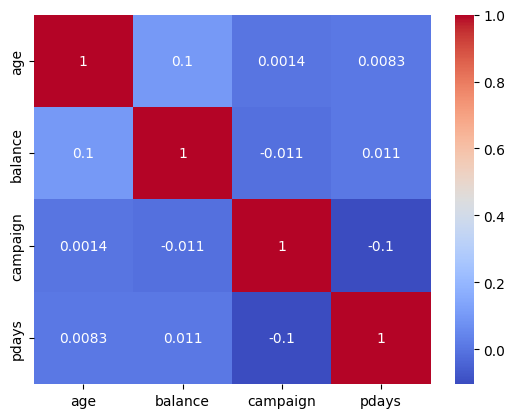

In [7]:
df2 = df.drop(columns=['deposit'],axis=1)
korelasi = df2.corr()
sns.heatmap(korelasi,cmap='coolwarm',annot=True)

Berdasarkan heatmap diatas, setiap kolom tidak saling berkorelasi satu sama lain.

## EDA ##

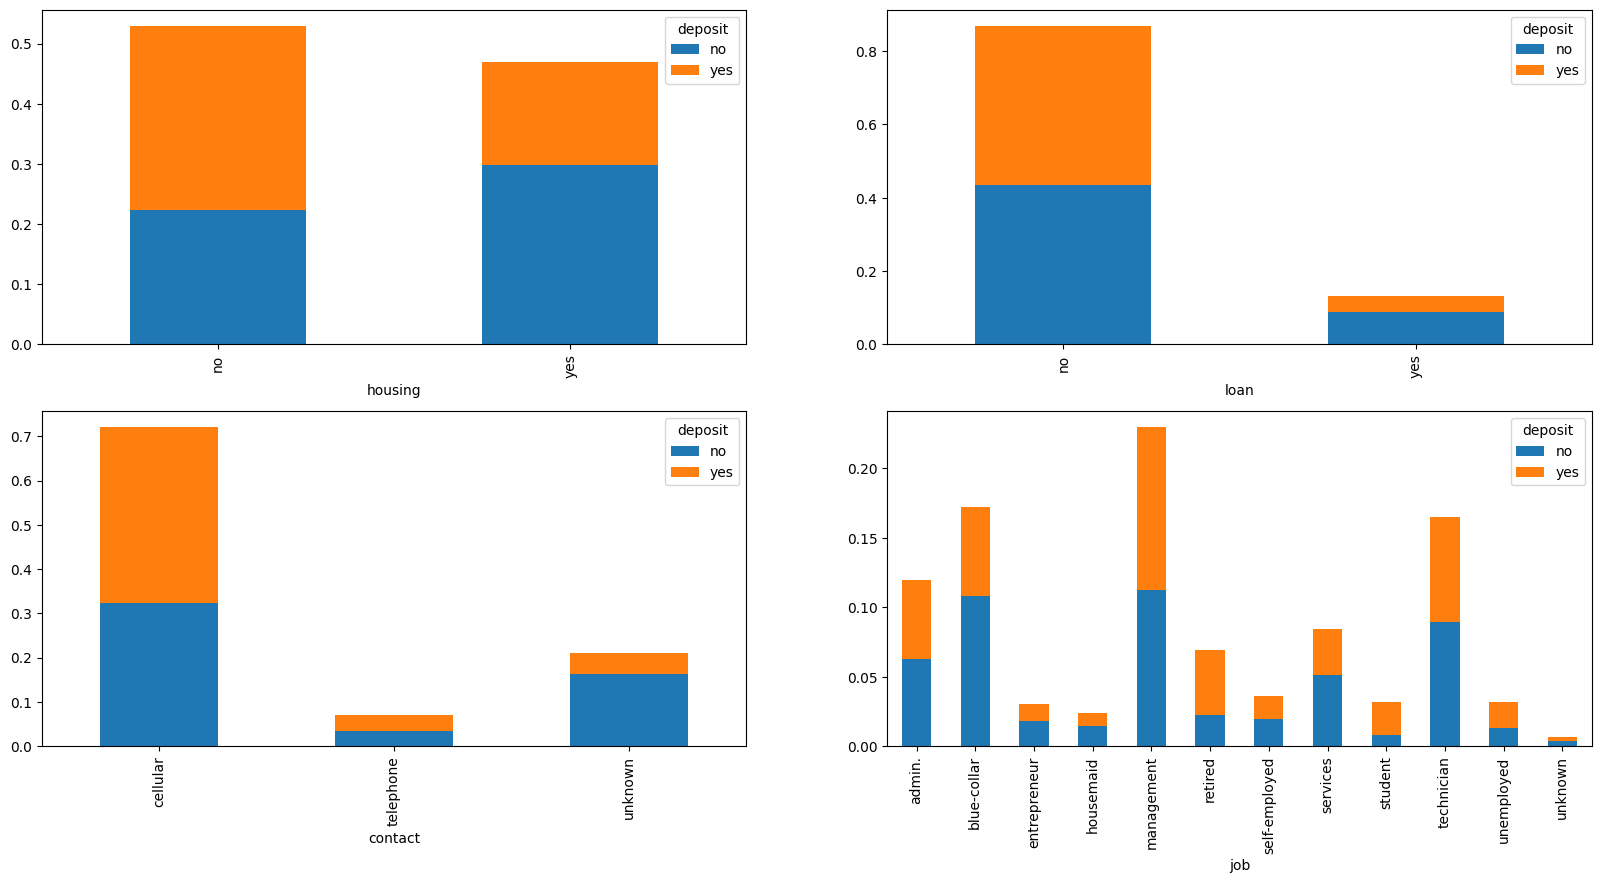

In [8]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df[['housing','loan','contact','job']]:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['deposit'],normalize=True).plot(kind='bar',stacked=True,ax=ax)


plt.show()

In [9]:
df3 = df.copy()
def kat_age(x):
    if x <= 25 :
        return 'Young'
    elif x <= 45 :
        return 'Adult'
    elif x > 45:
        return 'Old'

df3['kategori_usia'] = df3['age'].apply(kat_age)
df3.groupby('kategori_usia')['deposit'].value_counts(normalize=True).unstack()

deposit,no,yes
kategori_usia,,
Adult,0.549628,0.450372
Old,0.493895,0.506105
Young,0.315961,0.684039


In [10]:
def kat_balance(x):
    if x < 0 :
        return '< 0'
    elif x <= 1000 :
        return '< 1000'
    elif x > 1000:
        return '> 1000'

df3['kategori_balance'] = df3['balance'].apply(kat_balance)
df3.groupby('kategori_balance')['deposit'].value_counts(normalize=True).unstack()

deposit,no,yes
kategori_balance,,
< 0,0.707724,0.292276
< 1000,0.557645,0.442355
> 1000,0.434103,0.565897


Berdasarkan barplot dan table diatas saya mendapatkan beberapa informasi atau insight yaitu :

1. Berdasarkan kolom `housing`, nasabah yang tidak memiliki kredit rumah cenderung lebih berpotensi tertarik deposit daripada yang memiliki kredit rumah.
2. Berdasarkan kolom `loan`, nasabah yang tidak memiliki pinjaman cenderung lebih berpotensi tertarik deposit daripada yang memiliki pinjaman.
3. Berdasarkan kolom `contact`, metode menghubungi nasabah ke celluler lebih berpotensi mendapatkan nasabah yang tertarik deposit.
4. Berdasarkan kolom `job`, nasabah yang berprofesi dibidang management lebih banyak berpotensi tertarik deposit.
5. Berdasarkan kolom `age`, nasabah yang masih remaja (rentang usia 18-25 tahun) lebih banyak berpotensi tertarik deposit.
6. Berdasarkan kolom `balance`, nasabah yang memiliki saldo <0 lebih berpotensi untuk tidak tertarik deposit.

## Data Preprocessing - Feature Engineering 

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,RobustScaler,MinMaxScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split

Melakukan perubahan pada target yaitu kolom `deposit` yang awalnya berisi 'yes' dan 'no' menjadi 'no' = 0 dan 'yes' = 1

In [12]:
df['deposit'] = df['deposit'].replace({'no':0,'yes':1}) 
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,1
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,1
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,0
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,0


Sekarang saya akan melakukan fitur encoding dan scalling untuk fitur2 kategorikal dan numerikal yang saya miliki.
Yang akan saya lakukan adalah :

- Kategorikal
    -  kolom `job` akan saya lakukan encoding menggunakan Binary Encoding mengingat kolom tidak memiliki urutan dan memiliki 12 nunique. Jika menggunakan One Hot Encoding maka akan terlalu banyak kolom-kolom baru yang juga dapat menyebabkan terjadinya overfitting.
    - kolom `housing` akan saya lakukan encoding menggunakan One Hot Encoding mengingat kolom tidak memiliki urutan dan hanya memiliki 2 nunique.
    - kolom `loan` akan saya lakukan encoding menggunakan One Hot Encoding mengingat kolom tidak memiliki urutan dan hanya memiliki 2 nunique.
    - kolom `contact` akan saya lakukan encoding menggunakan One Hot Encoding mengingat kolom tidak memiliki urutan dan hanya memiliki 3 nunique.
    - kolom `month` akan saya lakukan encoding menggunakan Ordinal Encoding mengingat kolom memiliki urutan (ordinal) dan memiliki 12 nunique.
    - kolom `poutcome` akan saya lakukan encoding menggunakan One Hot Encoding mengingat kolom tidak memiliki urutan dan hanya memiliki 4 nunique.

- Numerikal
    - kolom `balance` akan saya lakukan scaling mengingat nilai minnya -6847 dan nilai maxnya 66653. Tujuannya diharapkan bisa membantu meningkatkan hasil modeling. Dan Metode scaling yang saya akan gunakan adalah RobustScaler agar data tetap memiliki urutan dan urutannya pun tidak berubah serta tidak sensitif terhadap outlier.
    - kolom `campaign` akan saya lakukan scaling meskipun nilai minnya 1 dan nilai maxnya 63. Tujuannya diharapkan bisa membantu meningkatkan hasil modeling. Dan metode scaling yang saya akan gunakan adalah RobustScaler agar data tetap memiliki urutan dan urutannya pun tidak berubah serta tidak sensitif terhadap outlier.
    - kolom `pdays` akan saya lakukan scaling meskipun nilai minnya -1 dan nilai maxnya 854. Tujuannya diharapkan bisa membantu meningkatkan hasil modeling. Dan metode scaling yang saya akan gunakan adalah RobustScaler agar data tetap memiliki urutan dan urutannya pun tidak berubah serta tidak sensitif terhadap outlier.
    - kolom `age` tidak akan saya lakukan scaling karena memiliki interval rentang yang cukup jelas untuk membedakan usia setiap nasabah dan rentang angkanya pun tidak terlalu jauh yaitu min 18 dan max 95


In [13]:
X = df.drop(columns=['deposit'])
y = df['deposit']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y,test_size=0.2)

In [15]:
ct = ColumnTransformer(transformers=[
    ("OneHotEncoding",OneHotEncoder(drop='first'),['housing','loan','contact','poutcome']),
    ("OrdinalEncoding",ce.OrdinalEncoder(),['month']),
    ("BinaryEncoding",ce.BinaryEncoder(),['job']),
    ("RobustScaler",RobustScaler(),['balance','campaign','pdays']),
],remainder='passthrough',verbose_feature_names_out=False)

ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoding', OneHotEncoder(drop='first'),
                                 ['housing', 'loan', 'contact', 'poutcome']),
                                ('OrdinalEncoding', OrdinalEncoder(),
                                 ['month']),
                                ('BinaryEncoding', BinaryEncoder(), ['job']),
                                ('RobustScaler', RobustScaler(),
                                 ['balance', 'campaign', 'pdays'])],
                  verbose_feature_names_out=False)

In [16]:
bin_cols = ct.named_transformers_['BinaryEncoding'].get_feature_names_out()
ohe_cols = ct.named_transformers_['OneHotEncoding'].get_feature_names_out()
ord_cols = ct.named_transformers_['OrdinalEncoding'].get_feature_names_out()
scal_cols = ct.named_transformers_['RobustScaler'].get_feature_names_out()
all_cols = list(ohe_cols) + list(ord_cols) + list(bin_cols) + list(scal_cols) + ['age']
all_cols


['housing_yes',
 'loan_yes',
 'contact_telephone',
 'contact_unknown',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'month',
 'job_0',
 'job_1',
 'job_2',
 'job_3',
 'balance',
 'campaign',
 'pdays',
 'age']

In [17]:
X_train_pre = ct.fit_transform(X_train)
df_Xtrain_pre = pd.DataFrame(X_train_pre,columns=all_cols)
df_Xtrain_pre

,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month,job_0,job_1,job_2,job_3,balance,campaign,pdays,age
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.004476,0.0,3.448980,56.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.106155,-0.5,0.000000,32.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,-0.311431,-0.5,0.000000,30.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,-0.486651,-0.5,11.836735,31.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,-0.555076,-0.5,0.000000,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.177138,-0.5,7.571429,23.0
6246,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.184812,-0.5,0.000000,32.0
6247,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,1.0,0.0,-0.334452,0.0,0.000000,35.0
6248,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,-0.349161,0.0,0.000000,32.0


## Model Benchmark

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_score, recall_score, ConfusionMatrixDisplay, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
import warnings

Cek Proposi Target

In [19]:
y.value_counts(normalize=True)

0    0.522335
1    0.477665
Name: deposit, dtype: float64

Berdasarkan hasil cek proporsi target, proporsi memiliki nilai yang seimbang (Balance) dengan 0 dan 1 memiliki selisih dibawah 10% (4,5%). Sehingga tidak perlu menggunakan metode Imbalance untuk melakukan Balancing terhadap proporsi target.

In [20]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
svm = SVC()
lgbm = LGBMClassifier()
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()

models = [logreg,knn,tree,svm,lgbm,rf,gbc,abc]

##### 1. Melakukan prediksi pada data train dan test tanpa menggunakan `Cross Validation`

In [21]:
warnings.filterwarnings('ignore')
train_score = []
test_score = []
for model in models:
    pipeline1 = Pipeline([
        ("Column Transform",ct),
        ("Model",model)
    ])
    
    pipeline1.fit(X_train,y_train)
    
    train_predict1 = pipeline1.predict(X_train)
    train_predict1_score = roc_auc_score(y_train,train_predict1)
    train_score.append(train_predict1_score)
    
    test_predict2 = pipeline1.predict(X_test)
    test_predict2_score= roc_auc_score(y_test,test_predict2)
    test_score.append(test_predict2_score)


In [22]:
name_models = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','SVC','LGBMClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier']
datas = list(zip(name_models,train_score,test_score))
df_train_test = pd.DataFrame(data=datas,columns=['Model','Train Score','Test Score'])
df_train_test

,Model,Train Score,Test Score
0,LogisticRegression,0.670402,0.686868
1,KNeighborsClassifier,0.767432,0.669625
2,DecisionTreeClassifier,0.999665,0.652054
3,SVC,0.647447,0.669255
4,LGBMClassifier,0.805774,0.718268
5,RandomForestClassifier,0.999665,0.708587
6,GradientBoostingClassifier,0.734218,0.734935
7,AdaBoostClassifier,0.715893,0.720672


Berdasarkan table diatas dengan melakukan Prediksi pada Data Train dan Test menggunakan metrik evaluasi `ROC_AUC`, saya mendapatkan beberapa informasi bahwa :

- Model `DecisionTreeClassifier` dan `RandomForestClassifier` terjadi OverFitting karena nilai Train Score nya tinggi tetapi nilai Test Score nya rendah.
- Model `LGBMClassifier`, `GradientBoostingClassifier`, `AdaBoostClassifier` memiliki nilai Train Score dan Test Score yang tinggi dan seimbang, sehingga model tidak terjadi OverFitting maupun UnderFitting.



Selanjutnya saya akan melihat `classifcation_report` dengan Data Test dari model `LGBMClassifier`, `GradientBoostingClassifier`, `AdaBoostClassifier` untuk melihat proporsi hasil prediksi pada Target.

In [23]:
models1 = [lgbm,gbc,abc]
for modelsa in models1:
    pipeline2 = Pipeline([
        ("Column Transform",ct),
        ("Model",modelsa)
    ])
        
    pipeline2.fit(X_train,y_train)
    test_predict3 = pipeline2.predict(X_test)
    test_predict3_score= classification_report(y_test,test_predict3)
    
    print(f"{modelsa} :\n",test_predict3_score)

LGBMClassifier() :
               precision    recall  f1-score   support

           0       0.70      0.82      0.76       816
           1       0.76      0.61      0.68       747

    accuracy                           0.72      1563
   macro avg       0.73      0.72      0.72      1563
weighted avg       0.73      0.72      0.72      1563

GradientBoostingClassifier() :
               precision    recall  f1-score   support

           0       0.71      0.84      0.77       816
           1       0.78      0.63      0.70       747

    accuracy                           0.74      1563
   macro avg       0.75      0.73      0.73      1563
weighted avg       0.75      0.74      0.74      1563

AdaBoostClassifier() :
               precision    recall  f1-score   support

           0       0.70      0.82      0.76       816
           1       0.76      0.63      0.68       747

    accuracy                           0.72      1563
   macro avg       0.73      0.72      0.72      156

Berdasarkan hasil `classification_report` dari beberapa model menggunakan Data Test saya mendapatkan beberapa informasi bahwa :

- Model `LGBMClassifier` diprediksi akan ada nasabah yg tertarik deposit sebanyak 61% (recall), namun ternyata masih ada 15% nasabah tambahan yg diprediksi tertarik deposit (precision) karena nilai (precision) dari target 1.0 adalah 76%.

- Model `GradientBoostingClassifier` diprediksi akan ada nasabah yg tertarik deposit sebanyak 63% (recall), namun ternyata masih ada 15% nasabah tambahan yg diprediksi tertarik deposit (precision) karena nilai (precision) dari target 1.0 adalah 78%.

- Model `AdaBoostClassifier` diprediksi akan ada nasabah yg tertarik deposit sebanyak 63% (recall), namun ternyata masih ada 13% nasabah tambahan yg diprediksi tertarik deposit (precision) karena nilai (precision) dari target 1.0 adalah 73%.

Dari informasi diatas, model `LGBMClassifier` dan `GradientBoostingClassifier` lebih baik karna ada 15% nasabah yang diprediksi sebenarnya tertarik deposit. Jika dilihat lebih detail `GradientBoostingClassifier` sedikit lebih baik dari `LGBMClassifier` karena memiliki nilai `macro avg` yang lebih tinggi.

Namun `GradientBoostingClassifier` belum menjadi jaminan menjadi model terbaik dari kasus ini karena saya belum melakukan `cross_validation`. Sehingga selanjutnya saya akan melakukan `cross_validation` dari semua kandidat model untuk memastikan seberapa baik setiap model dalam mengeneralisasi data.

## Model Performance & Evaluation

##### 1. Melakukan prediksi pada data train dan test menggunakan `Cross Validation`

In [24]:
def pipeline_cross_validation(model):
    pipe = Pipeline([
        ("Column Transform",ct),
        ("Model",model)
    ],verbose=False)
    
    return pipe

In [25]:
def cross_validation(model,X_train,y_train):
    pipe = pipeline_cross_validation(model)
    pipe = pipe.fit(X_train,y_train)
    cross_val = cross_val_score(pipe,X_train,y_train,cv=StratifiedKFold(n_splits=5),scoring='roc_auc')
    return cross_val

In [26]:
train_score_cval = []
warnings.filterwarnings('ignore')
for model in models:
    score_roc_auc = cross_validation(model,X_train,y_train)
    mean_score_roc_auc = np.mean(score_roc_auc)
    train_score_cval.append(mean_score_roc_auc)

    print(f"Model Mean ROC_AUC {model}",mean_score_roc_auc)

Model Mean ROC_AUC LogisticRegression() 0.7354331637770269
Model Mean ROC_AUC KNeighborsClassifier() 0.6894946914254787
Model Mean ROC_AUC DecisionTreeClassifier() 0.6159916478769549
Model Mean ROC_AUC SVC() 0.7018579369537837
Model Mean ROC_AUC LGBMClassifier() 0.768604892763973
Model Mean ROC_AUC RandomForestClassifier() 0.7572084516508013
Model Mean ROC_AUC GradientBoostingClassifier() 0.7734360931764488
Model Mean ROC_AUC AdaBoostClassifier() 0.7633524949915478


In [27]:
data_train_test_cval = list(zip(train_score_cval,test_score))
df_train_test_cval = pd.DataFrame(data=data_train_test_cval,columns=['Train Score Cval','Test Score'],index=name_models)
df_train_test_cval

,Train Score Cval,Test Score
LogisticRegression,0.735433,0.686868
KNeighborsClassifier,0.689495,0.669625
DecisionTreeClassifier,0.615992,0.652054
SVC,0.701858,0.669255
LGBMClassifier,0.768605,0.718268
RandomForestClassifier,0.757208,0.708587
GradientBoostingClassifier,0.773436,0.734935
AdaBoostClassifier,0.763352,0.720672


Berdasarkan table diatas dengan melakukan Prediksi pada Data Train dan Test menggunakan metrik evaluasi `ROC_AUC` dan `Cross Validation`, saya mendapatkan beberapa informasi bahwa :

- Semua model tidak mengalami OverFitting dan UnderFitting
- Model `GradientBoostingClassifier`,  memiliki nilai Train Score dan Test Score yang tertinggi dan seimbang, sehingga model tidak terjadi OverFitting maupun UnderFitting.

Selanjutnya saya akan mencoba melakukan Re-Data Preprocessing & Re-Feature Engineering dengan menambahkan `Feature Selection` & membuat `New Feature Polynomial`. Tujuannya untuk mengetahui apakah score model mengalami peningkatan atau tidak.


## Re : Data Preprocessing & Feature Engineering

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest

select = SelectKBest(k=32)
poly = PolynomialFeatures(degree=2,include_bias=False)

def pipeline_cross_validation_2(model):
    pipe2 = Pipeline([
        ("Column Transform",ct),
        ("Polynomial",poly),
        ("Feature Selection",select),
        ("Model",model)
    ],verbose=False)
    
    return pipe2

In [29]:
def cross_validation2(model,X_train,y_train):
    pipe2 = pipeline_cross_validation_2(model)
    pipe2 = pipe2.fit(X_train,y_train)
    cross_val2 = cross_val_score(pipe2,X_train,y_train,cv=StratifiedKFold(),scoring='roc_auc')
    return cross_val2

In [30]:
warnings.filterwarnings('ignore')
for model in models:
    score_roc_auc2 = cross_validation2(model,X_train,y_train)
    mean_score_roc_auc2 = np.mean(score_roc_auc2)

    print(f"Model Mean ROC_AUC {model}",mean_score_roc_auc2)

Model Mean ROC_AUC LogisticRegression() 0.7197408687131419
Model Mean ROC_AUC KNeighborsClassifier() 0.6822445561139029
Model Mean ROC_AUC DecisionTreeClassifier() 0.6352005048211963
Model Mean ROC_AUC SVC() 0.7081918012728267
Model Mean ROC_AUC LGBMClassifier() 0.7357717633599339
Model Mean ROC_AUC RandomForestClassifier() 0.696598100251128
Model Mean ROC_AUC GradientBoostingClassifier() 0.7463086232592262
Model Mean ROC_AUC AdaBoostClassifier() 0.742472700408628


Berdasarkan hasil Train Score diatas menunjukan bahwa dengan menambahkan `Polynomial Feature` dan `Feature Selection` justru membuat Train Score menjadi jauh menurun. 

Sehingga saya memutuskan untuk menggunakan model `GradientBoostingClassifier` `tanpa` menambahkan `Polynomial Feature` dan `Feature Selection`.

## Hyperparameter Tunning

In [31]:
estimator = Pipeline([
    ("CTransform",ct),
    ("Model",GradientBoostingClassifier())
    
],verbose=False)


In [32]:

param_space = [
    {
    'Model__learning_rate' : [0.1,0.5],
    'Model__n_estimators' : [100,200],
    'Model__subsample' : [1.0,2.0],
    'Model__min_samples_split' : [1,2],
    'Model__min_samples_leaf' : [1,2],
    'Model__max_depth' : [2,3],
    'Model__random_state' : [42,2020,None]
    }
    ] 

gscv = GridSearchCV(estimator=estimator,n_jobs=-1,param_grid=param_space,cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42),scoring='roc_auc')
gscv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('CTransform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHotEncoding',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome']),
                                                                        ('OrdinalEncoding',
                                                                         OrdinalEncoder(),
                                                                         ['month']),
                                                                        ('BinaryEncoding',
                                                                         BinaryEncoder(),
                                                                         ['job']),
                                                                        ('Ro...
                                                                          'pdays'])],
                                                          verbose_feature_names_out=False)),
                                       ('Model',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid=[{'Model__learning_rate': [0.1, 0.5],
                          'Model__max_depth': [2, 3],
                          'Model__min_samples_leaf': [1, 2],
                          'Model__min_samples_split': [1, 2],
                          'Model__n_estimators': [100, 200],
                          'Model__random_state': [42, 2020, None],
                          'Model__subsample': [1.0, 2.0]}],
             scoring='roc_auc')

In [33]:
best_params = gscv.best_params_
best_score = gscv.best_score_

display(best_score,best_params)

0.773766227769783

{'Model__learning_rate': 0.1,
 'Model__max_depth': 3,
 'Model__min_samples_leaf': 2,
 'Model__min_samples_split': 2,
 'Model__n_estimators': 100,
 'Model__random_state': 2020,
 'Model__subsample': 1.0}

Berdasarkan hasil tunning diatas terdapat beberapa perbedaan parameter terbaik setelah di lakukan tunning dari defaultnya.
Diantaranya :  
    
    1. `min_samples_leaf` : defaultnya 1, tunning 2
    2. `random_state` : defaultnya None, tunning 2020

In [34]:
model_terbaik = gscv.best_estimator_
model_terbaik.fit(X_train,y_train)

Pipeline(steps=[('CTransform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('OrdinalEncoding',
                                                  OrdinalEncoder(), ['month']),
                                                 ('BinaryEncoding',
                                                  BinaryEncoder(), ['job']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['balance', 'campaign',
                                                   'pdays'])],
                                   verbose_feature_names_out=False)),
                ('Model',
                 GradientBoostingClassifier(min_samples_leaf=2,
                                            random_state=2020))])

In [35]:

estimator.fit(X_train,y_train)

Pipeline(steps=[('CTransform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('OrdinalEncoding',
                                                  OrdinalEncoder(), ['month']),
                                                 ('BinaryEncoding',
                                                  BinaryEncoder(), ['job']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['balance', 'campaign',
                                                   'pdays'])],
                                   verbose_feature_names_out=False)),
                ('Model', GradientBoostingClassifier())])

In [36]:
predict_default = estimator.predict(X_test)
predict_default_proba = estimator.predict_proba(X_test)
predict_tunned = model_terbaik.predict(X_test)
predict_tunned_proba = model_terbaik.predict_proba(X_test)

roc_auc_default = roc_auc_score(y_test,predict_default)
roc_auc_tunned = roc_auc_score(y_test,predict_tunned)


print(f"ROC_AUC Score Default Gradient :", roc_auc_default)
print(f"ROC_AUC Score Tunned Gradient :", roc_auc_tunned)


ROC_AUC Score Default Gradient : 0.7349348373887709
ROC_AUC Score Tunned Gradient : 0.7365565201984408


Berdasarkan hasil diatas, score predict model `Gradient` pada data test mengalami sedikit peningkatan yang sebelumnya `0.734` menjadi `0.736`. Selanjutnya saya akan melihat classification reportnya

In [37]:
report_default = classification_report(y_test,predict_default)
report_tunned = classification_report(y_test,predict_tunned)

print(f"Classfication Default \n",report_default)
print(f"Classfication Tunned \n",report_tunned)

Classfication Default 
               precision    recall  f1-score   support

           0       0.71      0.84      0.77       816
           1       0.78      0.63      0.70       747

    accuracy                           0.74      1563
   macro avg       0.75      0.73      0.73      1563
weighted avg       0.75      0.74      0.74      1563

Classfication Tunned 
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       816
           1       0.78      0.64      0.70       747

    accuracy                           0.74      1563
   macro avg       0.75      0.74      0.74      1563
weighted avg       0.75      0.74      0.74      1563



Berdasarkan classification_report diatas, nilai `Precision` untuk kelas 0 mengalami peningkatan 0.01 setelah dilakukan tunning. Dan nilai `Recall` untuk kelas 0 mengalami penurunan 0.01 dan untuk kelas 1 mengalami peningkatan 0.01 setelah dilakukan tunning.  

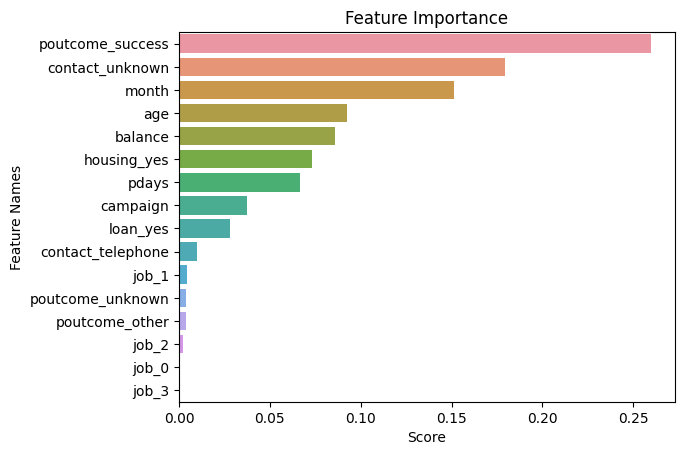

In [38]:
score = model_terbaik['Model'].feature_importances_
feature_score = list(zip(all_cols,score))
feature_importances = pd.DataFrame(data=feature_score,columns=['Feature Names','Score']).sort_values('Score',ascending=False)
sns.barplot(x=feature_importances['Score'],y=feature_importances['Feature Names'],orient='h')
plt.title("Feature Importance")
plt.show()


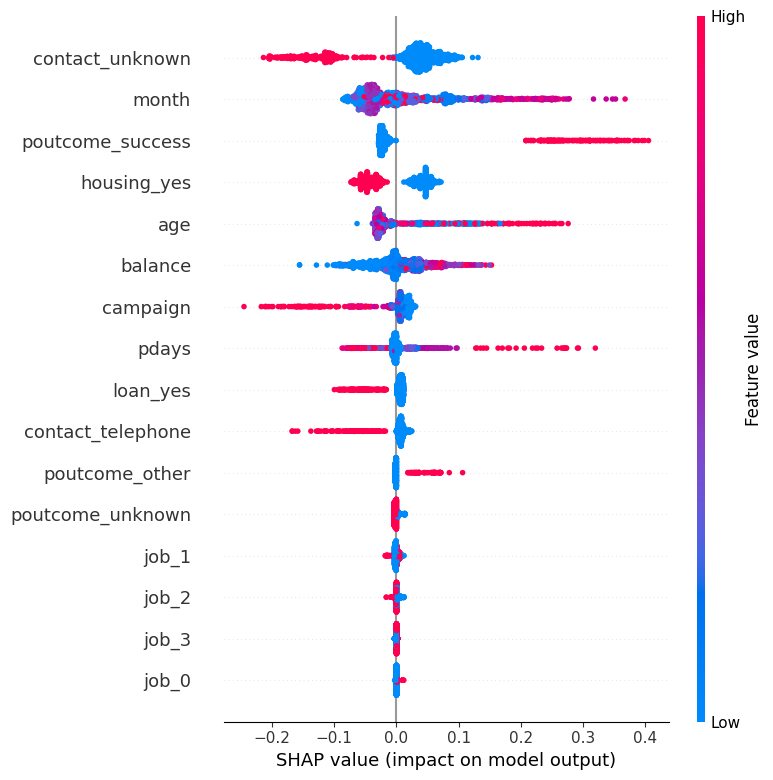

In [39]:
np.bool = np.bool_
import shap

model = model_terbaik['Model']
X_test_transform = model_terbaik.named_steps['CTransform'].transform(X_test)

explainer = shap.TreeExplainer(model,data = X_test_transform,feature_perturbation="interventional",
                                 model_output="probability")
shap_values = explainer.shap_values(X_test_transform)
shap.summary_plot(shap_values, X_test_transform,feature_names=all_cols)


In [40]:
print(f"Classfication Tunned \n",report_tunned)

Classfication Tunned 
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       816
           1       0.78      0.64      0.70       747

    accuracy                           0.74      1563
   macro avg       0.75      0.74      0.74      1563
weighted avg       0.75      0.74      0.74      1563



## Conclusion & Recommendation

Conclusion

-  Berdasarkan hasil classification report, model dapat memprediksi nasabah yang tertarik deposit sebanyak 64% (recall 1),  dan mengurangi nasabah yang tidak tertarik sebanyak 83% (recall 0). Kemudian ketepatan suatu model melakukan prediksi nasabah yang tertarik deposit yaitu 78% (precision 1). Artinya masih terdapat 14% nasabah yg diprediksi model tidak tertarik deposit namun sebenarnya tertarik deposit.

    Bila seandainya biaya untuk melakukan kampanye marketing per nasabah adalah 18,34$ (sumber : https://thefinancialbrand.com/news/bank-marketing/bank-marketing-budgets-advertising-roi-strategy-88835/) dan seandainya jumlah nasabah yang saya miliki untuk suatu kurun waktu sebanyak 200 orang (dimana andaikan 100 orang tertarik, dan 100 orang lagi tidak tertarik), maka hitungannya kurang lebih akan seperti ini :

    Tanpa Model (semua nasabah diasumsikan tertarik sehingga semua nasabah ditawarkan) :

    - Total Biaya -> 200 x 18,34 USD = 3668 USD
    - Total nasabah tertarik yang didapatkan -> 100 nasabah (karena semua ditawarkan)
    - Biaya yang terbuang -> 100 x 18,34 USD = 1834 USD (karena 100 nasabah menolak dan menjadi sia-sia)

    Dengan Model (hanya nasabah yang diprediksi model tertarik yang akan ditawarkan) :

    - Total Biaya -> (64 x 18,34 USD) + (14 x 18,34 USD) = 1173 USD + 256 USD = 1429 USD
    - Total nasabah tertarik yang didapatkan -> 64 nasabah (recall 1 yang tertarik 64%)
    - Biaya yang terbuang => 0 x 18,34 USD = 0 USD (karena recall 1 64%, terdapat 64 nasabah diprediksi tertarik, namun jika dilihat nilai precision 1 78%, maka sebenarnya terdapat 78 nasabah diprediksi tertarik)

    Berdasarkan contoh perhitungan diatas, model dapat mengurangi biaya yang dibutuhkan untuk kampanye marketing, dari yang sebelumnya 3668 USD menjadi 1429 USD. Selain itu juga dapat menghemat waktu karena dengan model kita hanya akan menawarkan product ke nasabah yg diprediksi tertarik deposit pada Marketing Campaign selanjutnya.

- Hasil model tertarik atau tidaknya suatu nasabah melakukan deposit bergantung dari beberapa fitur yang ada pada data, diantaranya :
    - `poutcome_success` merupakan fitur hasil kampanye sebelumnya, dimana apabila semakin tinggi nilai fitur tersebut maka peluang diprediksi tertarik deposit semakin tinggi, sebaliknya jika semakin rendah nilai fitur tersebut maka peluang diprediksi tidak tertarik deposit semakin tinggi.
    - `contact_unknown` merupakan fitur menghubungi nasabah melalui apa. dimana apabila semakin tinggi nilai fitur tersebut maka peluang diprediksi tidak tertarik deposit semakin tinggi, sebaliknya jika semakin rendah nilai fitur tersebut maka peluang di prediksi tertarik deposit semakin tinggi.
    - `month` merupakan fitur mengetahui kapan terakhir nasabah dihubungi, dimana apabila semakin rendah (tidak lama) nasabah dihubungi maka peluang diprediksi tidak tertarik deposit semakin tinggi, sebaliknya jika semakin tinggi (semakin lama) nasabah dihubungi maka peluang diprediksi tertarik deposit semakin tinggi.
    


Recommendation

Hal-hal yang bisa dilakukan untuk mengembangkan project ini dan membuat model menjadi lebih baik :

   - Menambahkan fitur baru yang dapat meningkatkan score model dan mempengaruhi ketertarikan nasabah untuk deposit atau tidak. Diantaranya :
      - range salary : range salary adalah perkiraan besaran gaji nasabah. mungkin saja semakin besar range gaji yang dimiliki suatu nasabah bisa meningkatkan peluang seorang nasabah tertarik deposit.
      - marital status : marital status adalah status nasabah apakah nasabah tersebut masih lajang atau sudah menikah. Dimana jika seorang nasabah sudah menikah tentunya biaya hidup yang akan dibutuhkan semakin banyak sehingga mungkin bisa menentukan tertarik atau tidaknya nasabah untuk deposit.
      - children : children adalah status nasabah sudah memiliki anak atau belum. Dimana jika seorang nasabah sudah memiliki anak tentunya biaya hidup yang akan dibutuhkan semakin banyak sehingga mungkin bisa menentukan tertarik atau tidaknya nasabah untuk deposit. 
<br><br>
   - Mencoba menggunakan model machine learning lain dan melakukan penyetelan tunning secara berulang serta, jika dilihat dari nilai `Recall` untuk kelas 0 83% dan 1 64% memiliki rentan score yg cukup jauh hal ini mengindikasikan adanya Imbalance, sehingga perlu penambahan metode Imbalance untuk menyeimbangkan proporsi pada Target.

   - Jika dilihat dari dataset masih terdapat fitur contact yang artinya metode marketing masih dilakukan secara tradtional marketing, yaitu menawarkan deposit dengan cara menelpon nasabah. Sehingga akan lebih baik dan efektif apabila menambahkan metode Marketing Campaign dengan metode digital marketing (sumber : https://www.simplilearn.com/traditional-marketing-vs-digital-marketing-article), terlebih lagi model yang dibuat sudah dapat membantu mengurangi biaya yang dibutuhkan untuk melakukan Marketing Campaign.